In [14]:
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, MultiPoint
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet
import matplotlib.cm as cm
import matplotlib.colors as co
import numpy as np
import random

#1 North America 2 Central America 3 South America
#4 East Asia 5 Southeast Asia 6 South Asia 7 Central Asia 12 Oceania
#8 Western Europe 9 Eastern Europe
#10 Middle East 11 Sub-saharian Africa

dataframe = pd.read_csv('amin_datapreprocessed.csv', 
                       usecols=["eventid", "country", "country_txt", "region", "longitude", "latitude", "iyear", "nkill", "gname",
                                     "success", "suicide", "attacktype1", "attacktype1_txt", "targtype1", "targtype1_txt", "natlty1", "weaptype1",
                                     "nkillter"]);
dataframe.columns

Index(['eventid', 'iyear', 'country', 'country_txt', 'region', 'latitude',
       'longitude', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'natlty1', 'gname', 'weaptype1', 'nkill',
       'nkillter'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

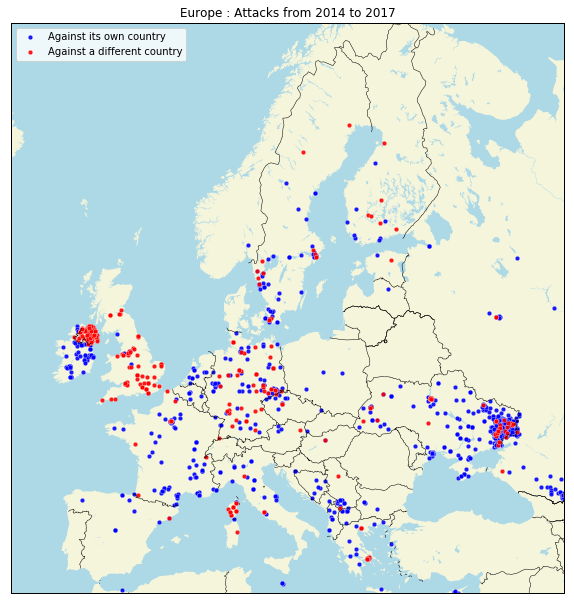

In [2]:
europe = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-15, 
        llcrnrlat=35,
        urcrnrlon=45,
        urcrnrlat=70,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

europe_dataframe = dataframe.loc[dataframe['region'] >= 8 ] #europe
europe_dataframe = europe_dataframe.loc[europe_dataframe['region'] <= 9 ]
europe_dataframe0 = europe_dataframe.loc[europe_dataframe['country'] == europe_dataframe['natlty1'] ]
europe_dataframe1 = europe_dataframe.loc[europe_dataframe['country'] != europe_dataframe['natlty1'] ]

europe_points0 = pd.Series(
                [Point(europe(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(europe_dataframe0['longitude'], 
                                               europe_dataframe0['latitude'])])
europe_points1 = pd.Series(
                [Point(europe(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(europe_dataframe1['longitude'], 
                                               europe_dataframe1['latitude'])])

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

dev = europe.scatter(
            [geom.x for geom in europe_points0],
            [geom.y for geom in europe_points0],
            20, marker='o', lw=.25,
            facecolor='blue', edgecolor='w', label='Against its own country',
            alpha=0.9,antialiased=True,
            zorder=2)
dev = europe.scatter(
            [geom.x for geom in europe_points1],
            [geom.y for geom in europe_points1],
            20, marker='o', lw=.25,
            facecolor='red', edgecolor='w', label='Against a different country',
            alpha=0.9,antialiased=True,
            zorder=2)

europe.fillcontinents(color='beige',lake_color='lightblue');
europe.drawcountries();
europe.drawmapboundary(fill_color='lightblue');
plt.title('Europe : Attacks from 2014 to 2017')
plt.legend()
plt.savefig("europe_nationality.png")

<Figure size 432x288 with 0 Axes>

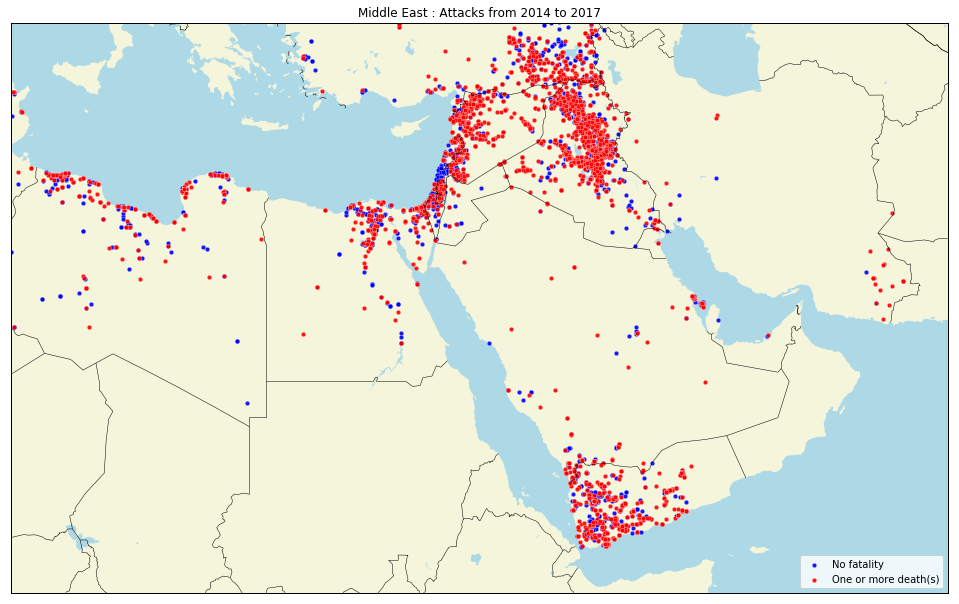

In [3]:
middle = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=10, 
        llcrnrlat=10,
        urcrnrlon=65,
        urcrnrlat=40,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

middle_dataframe = dataframe.loc[dataframe['region'] == 10 ] #europe and middle east
middle_dataframe0 = middle_dataframe.loc[middle_dataframe['nkill'] == 0 ]
middle_dataframe1 = middle_dataframe.loc[middle_dataframe['nkill'] > 0 ]

middle_points0 = pd.Series(
                [Point(middle(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(middle_dataframe0['longitude'], 
                                               middle_dataframe0['latitude'])])
middle_points1 = pd.Series(
                [Point(middle(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(middle_dataframe1['longitude'], 
                                               middle_dataframe1['latitude'])])

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

dev = middle.scatter(
            [geom.x for geom in middle_points0],
            [geom.y for geom in middle_points0],
            20, marker='o', lw=.25,
            facecolor='blue', edgecolor='w', label='No fatality',
            alpha=0.9,antialiased=True,
            zorder=2)
dev = middle.scatter(
            [geom.x for geom in middle_points1],
            [geom.y for geom in middle_points1],
            20, marker='o', lw=.25,
            facecolor='red', edgecolor='w', label='One or more death(s)',
            alpha=0.9,antialiased=True,
            zorder=2)

middle.fillcontinents(color='beige',lake_color='lightblue');
middle.drawcountries();
middle.drawmapboundary(fill_color='lightblue');
plt.title('Middle East : Attacks from 2014 to 2017')
plt.legend()
plt.savefig("middle_deaths.png")

<Figure size 432x288 with 0 Axes>

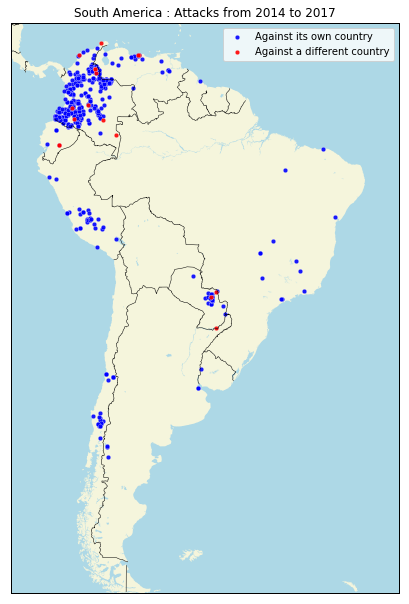

In [4]:
sa = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-85, 
        llcrnrlat=-55,
        urcrnrlon=-30,
        urcrnrlat=15,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

sa_dataframe = dataframe.loc[dataframe['region'] == 3 ] #south america
sa_dataframe0 = sa_dataframe.loc[sa_dataframe['country'] == sa_dataframe['natlty1'] ]
sa_dataframe1 = sa_dataframe.loc[sa_dataframe['country'] != sa_dataframe['natlty1'] ]

sa_points0 = pd.Series(
                [Point(sa(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(sa_dataframe0['longitude'], 
                                               sa_dataframe0['latitude'])])
sa_points1 = pd.Series(
                [Point(sa(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(sa_dataframe1['longitude'], 
                                               sa_dataframe1['latitude'])])

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

dev = sa.scatter(
            [geom.x for geom in sa_points0],
            [geom.y for geom in sa_points0],
            20, marker='o', lw=.25,
            facecolor='blue', edgecolor='w', label='Against its own country',
            alpha=0.9,antialiased=True,
            zorder=2)
dev = sa.scatter(
            [geom.x for geom in sa_points1],
            [geom.y for geom in sa_points1],
            20, marker='o', lw=.25,
            facecolor='red', edgecolor='w', label='Against a different country',
            alpha=0.9,antialiased=True,
            zorder=2)

sa.fillcontinents(color='beige',lake_color='lightblue');
sa.drawcountries();
sa.drawmapboundary(fill_color='lightblue');
plt.title('South America : Attacks from 2014 to 2017')
plt.legend()
plt.savefig("southamerica_nationality.png")

/Users/aminmekacher/miniconda3/envs/ntds_project/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



N_nodes:  2379   1021
N_edges:  0


<Figure size 432x288 with 0 Axes>

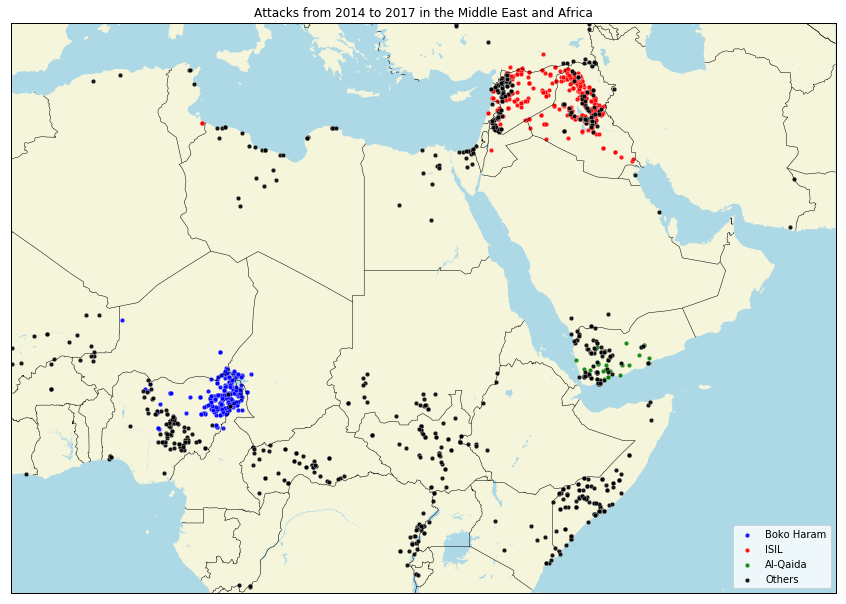

In [15]:
"""
We first plot the nodes corresponding to important (number of casualties higher than 50) on the map, for both African 
and Middle East regions, and we use a color code to discriminates attacks claimed by :
 * ISIL
 * AQAP (Al-Qaeda in the Arabian Peninsula)
 * Boko Haram
 * Unclaimed attacks or attacks claimed by another terrorist group
"""

middle = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-5, 
        llcrnrlat=-5,
        urcrnrlon=65,
        urcrnrlat=40,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

middle_dataframe = dataframe.loc[dataframe['nkill'] >= 10 ]
middle_dataframe = middle_dataframe.loc[middle_dataframe['region'] >= 10 ] #middle east
middle_dataframe = middle_dataframe.loc[middle_dataframe['region'] <= 11 ] #sub-saharan africa
middle_dataframe.reset_index(inplace = True)

bokoharam_dataframe = middle_dataframe.loc[middle_dataframe['gname'] == 'Boko Haram' ]
isil_dataframe = middle_dataframe.loc[middle_dataframe['gname'] == 'Islamic State of Iraq and the Levant (ISIL)' ]
aqap_dataframe = middle_dataframe.loc[middle_dataframe['gname'] == 'Al-Qaida in the Arabian Peninsula (AQAP)' ]

unclassified_dataframe = middle_dataframe.loc[middle_dataframe['gname'] != 'Boko Haram' ]
unclassified_dataframe = unclassified_dataframe.loc[middle_dataframe['gname'] != 'Islamic State of Iraq and the Levant (ISIL)' ]
unclassified_dataframe = unclassified_dataframe.loc[middle_dataframe['gname'] != 'Al-Qaida in the Arabian Peninsula (AQAP)' ]
unclassified_dataframe.reset_index(inplace = True)

classified_dataframe = pd.concat([middle_dataframe,unclassified_dataframe]).drop_duplicates(subset = ['eventid'], keep=False) 


bokoharam_points = pd.Series(
                [Point(middle(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(bokoharam_dataframe['longitude'], 
                                               bokoharam_dataframe['latitude'])])
isil_points = pd.Series(
                [Point(middle(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(isil_dataframe['longitude'], 
                                               isil_dataframe['latitude'])])

aqap_points = pd.Series(
                [Point(middle(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(aqap_dataframe['longitude'], 
                                               aqap_dataframe['latitude'])])
unclassified_points = pd.Series(
                [Point(middle(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(unclassified_dataframe['longitude'], 
                                               unclassified_dataframe['latitude'])])

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

n_edges = 0
total_nodes = middle_dataframe['longitude'].size
unclassified_nodes = unclassified_dataframe['longitude'].size

print("N_nodes: ", total_nodes, " ", unclassified_nodes)
#edge_middle = np.zeros((n_nodes, unclassified_nodes))
#adj_middle = np.zeros((n_nodes, n_nodes))

#for index, rows in classified_dataframe.iterrows():
 #   for index2, rows2 in unclassified_dataframe.iterrows():
  #      if (index2 > index and edge_middle[index, index2] == 0):
   #         threshold = 0
            #if (rows['targtype1_txt'] == rows2['targtype1_txt']):
             #   threshold = threshold + 0.0375
                #threshold = threshold + 0.25
            
                #threshold = threshold + 0.2
           # if (rows['attacktype1_txt'] == rows2['attacktype1_txt']):
            #    threshold = threshold + 0.01875
                #threshold = threshold + 0.15
            #if (rows['natlty1'] == rows2['natlty1']):
                #threshold = threshold + 0.0125
            #    threshold = threshold
            #if (rows['suicide'] == rows2['suicide']):
                #threshold = threshold + 0.0125
             #   threshold = threshold
            #if (rows['weaptype1'] == rows2['weaptype1']):
            #    threshold = threshold + 0.00625
                #threshold = threshold + 0.05
            #if (rows['country'] == rows2['country']):
                #threshold = threshold + 0.00625
             #   threshold = threshold

           # r = random.randint(1, 101) / 100
            #if (r <= threshold):
             #   n_edges = n_edges + 1
                #adj_isil[index, index2] = 1
                #adj_isil[index2, index] = 1
              #  lons = [rows['longitude'], rows2['longitude']]
               # lats = [rows['latitude'], rows2['latitude']]
                #x, y = middle(lons, lats)
                #middle.plot(x, y, marker=None,color='r')

print("N_edges: ", n_edges)

dev = middle.scatter(
            [geom.x for geom in bokoharam_points],
            [geom.y for geom in bokoharam_points],
            20, marker='o', lw=.25,
            facecolor='blue', edgecolor='w', label='Boko Haram',
            alpha=0.9,antialiased=True,
            zorder=2)
dev = middle.scatter(
            [geom.x for geom in isil_points],
            [geom.y for geom in isil_points],
            20, marker='o', lw=.25,
            facecolor='red', edgecolor='w', label='ISIL',
            alpha=0.9,antialiased=True,
            zorder=2)
dev = middle.scatter(
            [geom.x for geom in aqap_points],
            [geom.y for geom in aqap_points],
            20, marker='o', lw=.25,
            facecolor='green', edgecolor='w', label='Al-Qaida',
            alpha=0.9,antialiased=True,
            zorder=2)
dev = middle.scatter(
            [geom.x for geom in unclassified_points],
            [geom.y for geom in unclassified_points],
            20, marker='o', lw=.25,
            facecolor='black', edgecolor='w', label='Others',
            alpha=0.9,antialiased=True,
            zorder=2)

middle.fillcontinents(color='beige',lake_color='lightblue');
middle.drawcountries();
middle.drawmapboundary(fill_color='lightblue');
plt.title('Attacks from 2014 to 2017 in the Middle East and Africa')
plt.legend()
plt.savefig("groups.png")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

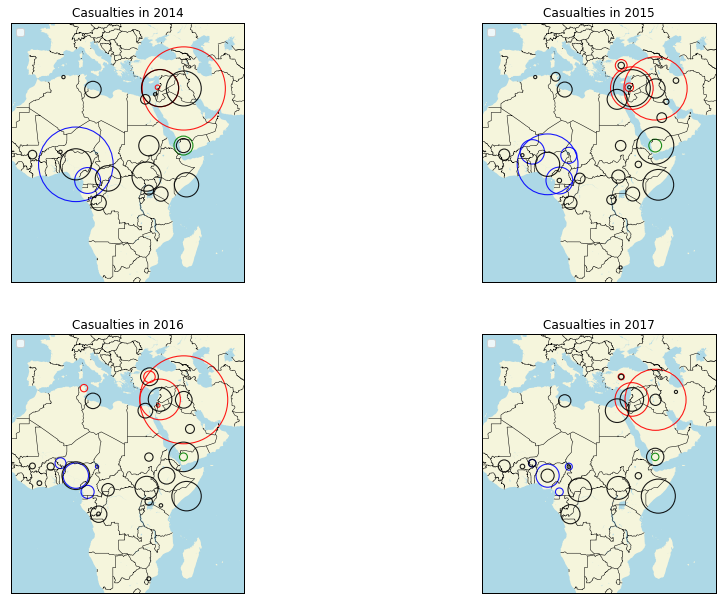

In [6]:
"""
To determine where the stronghold of each of these three organizations lies between the years, we computed the number of
civilians killed by each aforementioned group. To see if there has been any substantial difference throughout the years 
(a group losing strength or moving their stronghold), we plotted the number of casualties for each studied year
"""

middle = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-15, 
        llcrnrlat=-30,
        urcrnrlon=65,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

columns = ['country_txt', 'nkill', 'gname', 'iyear']
middle_casualties = pd.DataFrame(middle_dataframe, columns=columns)

affected_countries = middle_casualties['country_txt'].unique()
terrorist_groups = np.array(['Islamic State of Iraq and the Levant (ISIL)', 'Boko Haram', 'Al-Qaida in the Arabian Peninsula (AQAP)',
                   'Others'])

casualties_matrix_2014 = np.zeros((affected_countries.size, terrorist_groups.size))
casualties_matrix_2015 = np.zeros((affected_countries.size, terrorist_groups.size))
casualties_matrix_2016 = np.zeros((affected_countries.size, terrorist_groups.size))
casualties_matrix_2017 = np.zeros((affected_countries.size, terrorist_groups.size))

for index, rows in middle_casualties.iterrows():
    country_index = np.where(rows['country_txt'] == affected_countries)
    group_index = np.where(rows['gname'] == terrorist_groups)[0]
    year_index = rows['iyear']
    
    if (len(group_index) == 0):
        group_index = 3
        
    if year_index == 2014: casualties_matrix_2014[country_index, group_index] += rows['nkill'];
    elif year_index ==  2015: casualties_matrix_2015[country_index, group_index] += rows['nkill'];
    elif year_index ==  2016: casualties_matrix_2016[country_index, group_index] += rows['nkill'];
    elif year_index ==  2017: casualties_matrix_2017[country_index, group_index] += rows['nkill'];
    
    
# We create a pandas dataframe with the affected countries and their latitude and longitude, by taking their respective 
# capitals as references

country_data = {'country': ['Iraq', 'Nigeria', 'Syria', 'Central African Republic',
                           'South Sudan', 'Yemen', 'Mali', 'Somalia', 'Sudan',
                           'Libya', 'Algeria', 'Kenya', 'Egypt', 'Uganda',
                           'Lebanon', 'Cameroon', 'West Bank and Gaza Strip',
                           'Democratic Republic of Congo', 'Niger', 'Chad',
                           'Tunisia', 'Iran', 'Saudi Arabia', 'Kuwait',
                           'Turkey', 'Burkina Faso', 'Mozambique', 'Ethiopia',
                           'Burundi', 'Ivory Coast', 'Republic of the Congo', 'Jordan'], 
                'longitude': [44.3, 7.32, 36.18, 18.35, 
                              31.57, 44.19, -7.55, 45.25, 32.35,
                              13.18, 3.08, 36.48, 31.14, 32.3,
                             35.31, 11.35, 34.47,
                             15.15, 2.06, 14.59,
                             10.11, 51.3, 46.42, 48,
                             32.54, -1.3, 32.32, 38.42,
                             29.18, -5.17, 15.12, 35.52],
                'latitude': [33.2, 9.05, 33.3, 4.23, 
                             4.86, 15.37, 12.34, 2.02, 15.31,
                             32.89, 36.42, -1.17, 30.01, 0.2,
                            33.53, 3.5, 31.5,
                            -4.2, 13.27, 12.1,
                            36.5, 35.44, 24.41, 29.3,
                            39.57, 12.15, -25.58, 9.02,
                            -3.16, 6.49, -4.09, 31.57]}

country_dataframe = pd.DataFrame(data=country_data)

# We add new columns to this new dataframe with the number of casualties for each considered terrorist group

for i in range(0, 4):
    column_2014 = casualties_matrix_2014[:, i]
    label_2014 = terrorist_groups[i] + " " + str(2014)
    country_dataframe[label_2014] = column_2014
    
    column_2015 = casualties_matrix_2015[:, i]
    label_2015 = terrorist_groups[i] + " " + str(2015)
    country_dataframe[label_2015] = column_2015
    
    column_2016 = casualties_matrix_2016[:, i]
    label_2016 = terrorist_groups[i] + " " + str(2016)
    country_dataframe[label_2016] = column_2016
    
    column_2017 = casualties_matrix_2017[:, i]
    label_2017 = terrorist_groups[i] + " " + str(2017)
    country_dataframe[label_2017] = column_2017
    
    
casualties_points = pd.Series(
                    [Point(middle(mapped_x, mapped_y))
                     for mapped_x, mapped_y in zip(country_dataframe['longitude'], 
                                               country_dataframe['latitude'])])

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(221, facecolor='w', frame_on=False)
fig.set_size_inches(10.5, 10.5)
    
dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Boko Haram 2014'], marker='o', lw=1.1,
            facecolor='none', edgecolor='blue',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Islamic State of Iraq and the Levant (ISIL) 2014'], marker='o', lw=1.1,
            facecolor='none', edgecolor='red',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Al-Qaida in the Arabian Peninsula (AQAP) 2014'], marker='o', lw=1.1,
            facecolor='none', edgecolor='green', 
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Others 2014'], marker='o', lw=1.1,
            facecolor='none', edgecolor='black',
            alpha=0.9,antialiased=True,
            zorder=2)

middle.fillcontinents(color='beige',lake_color='lightblue');
middle.drawcountries();
middle.drawmapboundary(fill_color='lightblue');
ax.set_title('Casualties in 2014')
plt.legend()

middle = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-15, 
        llcrnrlat=-30,
        urcrnrlon=65,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

ax = fig.add_subplot(222, facecolor='w', frame_on=False)
fig.set_size_inches(15.5, 10.5)
    
dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Boko Haram 2015'], marker='o', lw=1.1,
            facecolor='none', edgecolor='blue',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Islamic State of Iraq and the Levant (ISIL) 2015'], marker='o', lw=1.1,
            facecolor='none', edgecolor='red',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Al-Qaida in the Arabian Peninsula (AQAP) 2015'], marker='o', lw=1.1,
            facecolor='none', edgecolor='green', 
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Others 2015'], marker='o', lw=1.1,
            facecolor='none', edgecolor='black',
            alpha=0.9,antialiased=True,
            zorder=2)

middle.fillcontinents(color='beige',lake_color='lightblue');
middle.drawcountries();
middle.drawmapboundary(fill_color='lightblue');
ax.set_title('Casualties in 2015')
plt.legend()

middle = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-15, 
        llcrnrlat=-30,
        urcrnrlon=65,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

ax = fig.add_subplot(223, facecolor='w', frame_on=False)
fig.set_size_inches(15.5, 10.5)
    
dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Boko Haram 2016'], marker='o', lw=1.1,
            facecolor='none', edgecolor='blue',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Islamic State of Iraq and the Levant (ISIL) 2016'], marker='o', lw=1.1,
            facecolor='none', edgecolor='red',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Al-Qaida in the Arabian Peninsula (AQAP) 2016'], marker='o', lw=1.1,
            facecolor='none', edgecolor='green', 
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Others 2016'], marker='o', lw=1.1,
            facecolor='none', edgecolor='black',
            alpha=0.9,antialiased=True,
            zorder=2)

middle.fillcontinents(color='beige',lake_color='lightblue');
middle.drawcountries();
middle.drawmapboundary(fill_color='lightblue');
ax.set_title('Casualties in 2016')
plt.legend()

middle = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-15, 
        llcrnrlat=-30,
        urcrnrlon=65,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

ax = fig.add_subplot(224, facecolor='w', frame_on=False)
fig.set_size_inches(15.5, 10.5)
    
dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Boko Haram 2017'], marker='o', lw=1.1,
            facecolor='none', edgecolor='blue',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Islamic State of Iraq and the Levant (ISIL) 2017'], marker='o', lw=1.1,
            facecolor='none', edgecolor='red',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Al-Qaida in the Arabian Peninsula (AQAP) 2017'], marker='o', lw=1.1,
            facecolor='none', edgecolor='green', 
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Others 2017'], marker='o', lw=1.1,
            facecolor='none', edgecolor='black',
            alpha=0.9,antialiased=True,
            zorder=2)

middle.fillcontinents(color='beige',lake_color='lightblue');
middle.drawcountries();
middle.drawmapboundary(fill_color='lightblue');
ax.set_title('Casualties in 2017')
plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

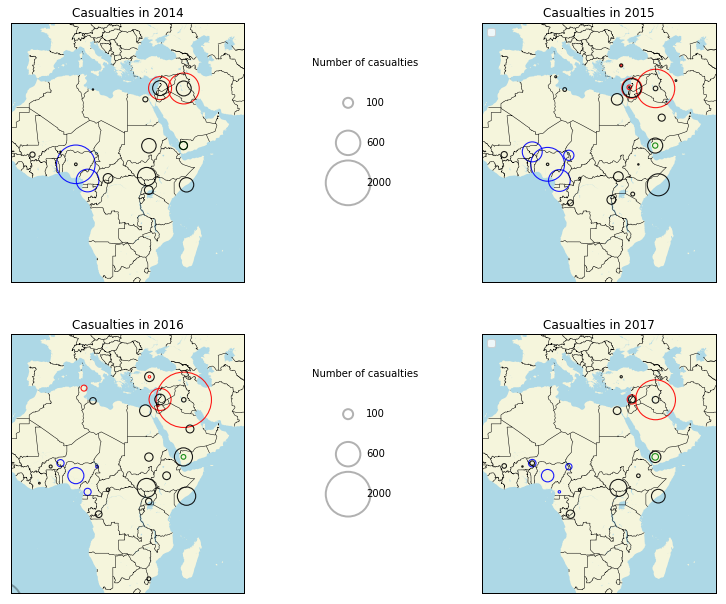

In [43]:
"""
Another interesting data vizualisation to consider is to see how many casualties each terrorist group had to suffer during
these four years. Analyzing the two maps side-by-side could help us notice if any group lost their grip on a 
specific territory due to the army or other militia's retaliation
"""

middle = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-15, 
        llcrnrlat=-30,
        urcrnrlon=65,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

columns = ['country_txt', 'nkillter', 'gname', 'iyear']
middle_casualties_ter = pd.DataFrame(middle_dataframe, columns=columns)

affected_countries_ter = middle_casualties_ter['country_txt'].unique()

casualties_ter_2014 = np.zeros((affected_countries_ter.size, terrorist_groups.size))
casualties_ter_2015 = np.zeros((affected_countries_ter.size, terrorist_groups.size))
casualties_ter_2016 = np.zeros((affected_countries_ter.size, terrorist_groups.size))
casualties_ter_2017 = np.zeros((affected_countries_ter.size, terrorist_groups.size))

for index, rows in middle_casualties_ter.iterrows():
    if (~np.isnan(rows['nkillter'])):
        country_index = np.where(rows['country_txt'] == affected_countries_ter)
        group_index = np.where(rows['gname'] == terrorist_groups)[0]
        year_index = rows['iyear']

        if (len(group_index) == 0):
            group_index = 3

        if year_index == 2014: casualties_ter_2014[country_index, group_index] += rows['nkillter'];
        elif year_index ==  2015: casualties_ter_2015[country_index, group_index] += rows['nkillter'];
        elif year_index ==  2016: casualties_ter_2016[country_index, group_index] += rows['nkillter'];
        elif year_index ==  2017: casualties_ter_2017[country_index, group_index] += rows['nkillter'];
            
country_dataframe = pd.DataFrame(data=country_data)

# We add new columns to this new dataframe with the number of casualties for each considered terrorist group

for i in range(0, 4):
    column_2014 = casualties_ter_2014[:, i]
    label_2014 = terrorist_groups[i] + " " + str(2014)
    country_dataframe[label_2014] = column_2014
    
    column_2015 = casualties_ter_2015[:, i]
    label_2015 = terrorist_groups[i] + " " + str(2015)
    country_dataframe[label_2015] = column_2015
    
    column_2016 = casualties_ter_2016[:, i]
    label_2016 = terrorist_groups[i] + " " + str(2016)
    country_dataframe[label_2016] = column_2016
    
    column_2017 = casualties_ter_2017[:, i]
    label_2017 = terrorist_groups[i] + " " + str(2017)
    country_dataframe[label_2017] = column_2017
    
    
casualties_points = pd.Series(
                    [Point(middle(mapped_x, mapped_y))
                     for mapped_x, mapped_y in zip(country_dataframe['longitude'], 
                                               country_dataframe['latitude'])])

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(221, facecolor='w', frame_on=False)
fig.set_size_inches(10.5, 10.5)
    
dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Boko Haram 2014'], marker='o', lw=1.1,
            facecolor='none', edgecolor='blue',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Islamic State of Iraq and the Levant (ISIL) 2014'], marker='o', lw=1.1,
            facecolor='none', edgecolor='red',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Al-Qaida in the Arabian Peninsula (AQAP) 2014'], marker='o', lw=1.1,
            facecolor='none', edgecolor='green', 
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Others 2014'], marker='o', lw=1.1,
            facecolor='none', edgecolor='black',
            alpha=0.9,antialiased=True,
            zorder=2)

middle.fillcontinents(color='beige',lake_color='lightblue');
middle.drawcountries();
middle.drawmapboundary(fill_color='lightblue');
ax.set_title('Casualties in 2014')
plt.legend()

for area in [100, 600, 2000]:
    plt.scatter([], [], facecolor='none', edgecolor='black', alpha=0.3, s=area,
                label=str(area), lw=2)
plt.legend(scatterpoints=1, frameon=False, labelspacing=3, title='Number of casualties',
          bbox_to_anchor=(1.25, 0.9), bbox_transform=ax.transAxes)

middle = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-15, 
        llcrnrlat=-30,
        urcrnrlon=65,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

ax = fig.add_subplot(222, facecolor='w', frame_on=False)
fig.set_size_inches(15.5, 10.5)
    
dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Boko Haram 2015'], marker='o', lw=1.1,
            facecolor='none', edgecolor='blue',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Islamic State of Iraq and the Levant (ISIL) 2015'], marker='o', lw=1.1,
            facecolor='none', edgecolor='red',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Al-Qaida in the Arabian Peninsula (AQAP) 2015'], marker='o', lw=1.1,
            facecolor='none', edgecolor='green', 
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Others 2015'], marker='o', lw=1.1,
            facecolor='none', edgecolor='black',
            alpha=0.9,antialiased=True,
            zorder=2)

middle.fillcontinents(color='beige',lake_color='lightblue');
middle.drawcountries();
middle.drawmapboundary(fill_color='lightblue');
ax.set_title('Casualties in 2015')
plt.legend()

middle = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-15, 
        llcrnrlat=-30,
        urcrnrlon=65,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

ax = fig.add_subplot(223, facecolor='w', frame_on=False)
fig.set_size_inches(15.5, 10.5)
    
dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Boko Haram 2016'], marker='o', lw=1.1,
            facecolor='none', edgecolor='blue',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Islamic State of Iraq and the Levant (ISIL) 2016'], marker='o', lw=1.1,
            facecolor='none', edgecolor='red',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Al-Qaida in the Arabian Peninsula (AQAP) 2016'], marker='o', lw=1.1,
            facecolor='none', edgecolor='green', 
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Others 2016'], marker='o', lw=1.1,
            facecolor='none', edgecolor='black',
            alpha=0.9,antialiased=True,
            zorder=2)

middle.fillcontinents(color='beige',lake_color='lightblue');
middle.drawcountries();
middle.drawmapboundary(fill_color='lightblue');
ax.set_title('Casualties in 2016')
plt.legend()

for area in [100, 600, 2000]:
    plt.scatter([], [], facecolor='none', edgecolor='black', alpha=0.3, s=area,
                label=str(area), lw=2)
plt.legend(scatterpoints=1, frameon=False, labelspacing=3, title='Number of casualties',
          bbox_to_anchor=(1.25, 0.9), bbox_transform=ax.transAxes)

middle = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-15, 
        llcrnrlat=-30,
        urcrnrlon=65,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

ax = fig.add_subplot(224, facecolor='w', frame_on=False)
fig.set_size_inches(15.5, 10.5)
    
dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Boko Haram 2017'], marker='o', lw=1.1,
            facecolor='none', edgecolor='blue',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Islamic State of Iraq and the Levant (ISIL) 2017'], marker='o', lw=1.1,
            facecolor='none', edgecolor='red',
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Al-Qaida in the Arabian Peninsula (AQAP) 2017'], marker='o', lw=1.1,
            facecolor='none', edgecolor='green', 
            alpha=0.9,antialiased=True,
            zorder=2)

dev = middle.scatter(
            [geom.x for geom in casualties_points],
            [geom.y for geom in casualties_points],
            country_dataframe['Others 2017'], marker='o', lw=1.1,
            facecolor='none', edgecolor='black',
            alpha=0.9,antialiased=True,
            zorder=2)

middle.fillcontinents(color='beige',lake_color='lightblue');
middle.drawcountries();
middle.drawmapboundary(fill_color='lightblue');
ax.set_title('Casualties in 2017')
plt.legend()
            



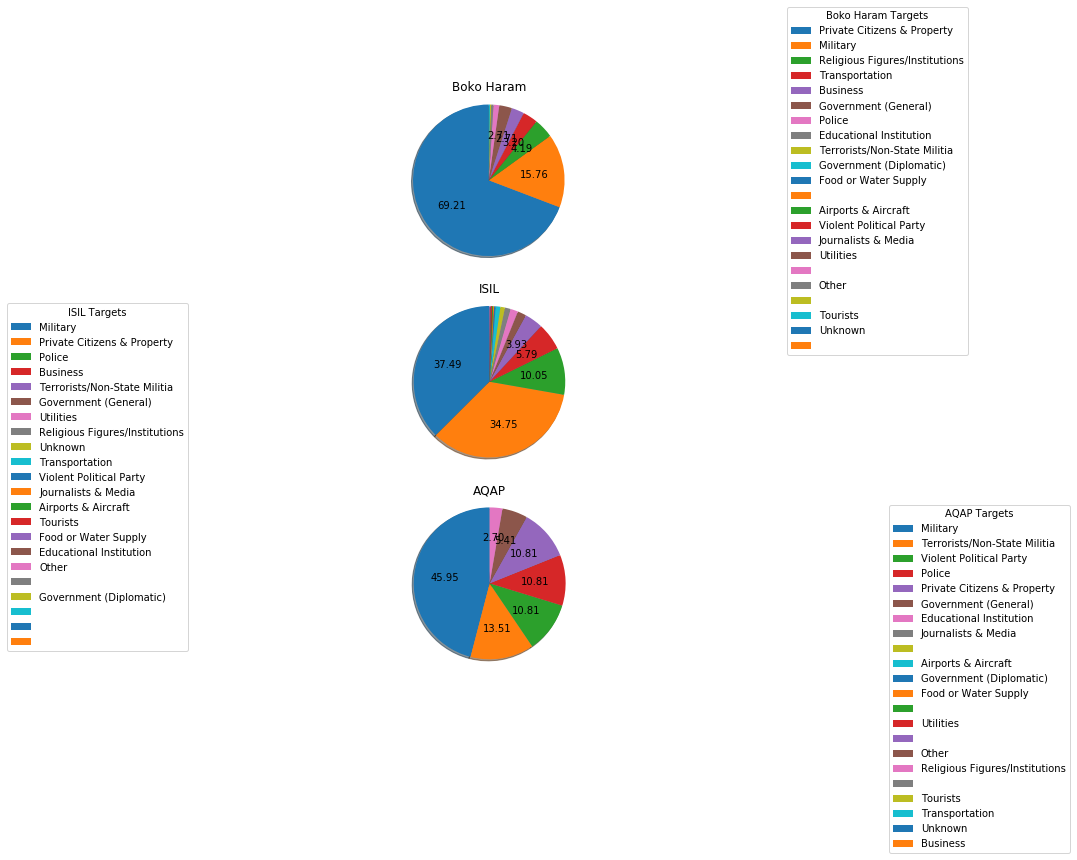

In [8]:
"""
According to the GTD codebook, 22 different targets are defined for each attack, ranging from militaries, civilians, 
religions authorities or journalists. To see which category has been mostly targeted by the three groups we are analyzing,
we are calculating their occurence in the respective dataset. Doing so will allow us to find the most proeminent features
of each terrorist group and see if we can affiliate other attacks to their techniques
"""

number_targets = 22
bokoharam_target = np.zeros((number_targets, 1))
isil_target = np.zeros((number_targets, 1))
aqap_target = np.zeros((number_targets, 1))
targets_label = [None] * number_targets

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 2 else ''

# Iterating through each dataframe separately

for index, rows in bokoharam_dataframe.iterrows():
    target = rows['targtype1'] - 1
    bokoharam_target[target] += 1
    if targets_label[target] == None:
        targets_label[target] = rows['targtype1_txt']
        
sort_bokoharam = np.fliplr([np.argsort(bokoharam_target[:, 0])])[0]
bokoharam_pie = np.fliplr([np.sort(bokoharam_target[:, 0])])[0]
        
for index, rows in isil_dataframe.iterrows():
    target = rows['targtype1'] - 1
    isil_target[target] += 1
    if targets_label[target] == None:
        targets_label[target] = rows['targtype1_txt']
        
sort_isil = np.fliplr([np.argsort(isil_target[:, 0])])[0]
isil_pie = np.fliplr([np.sort(isil_target[:, 0])])[0]
        
for index, rows in aqap_dataframe.iterrows():
    target = rows['targtype1'] - 1
    aqap_target[target] += 1
    if targets_label[target] == None:
        targets_label[target] = rows['targtype1_txt']
        
sort_aqap = np.fliplr([np.argsort(aqap_target[:, 0])])[0]
aqap_pie = np.fliplr([np.sort(aqap_target[:, 0])])[0]

bokoharam_label = [targets_label[i] for i in sort_bokoharam]
isil_label = [targets_label[i] for i in sort_isil]
aqap_label = [targets_label[i] for i in sort_aqap]
        
fig = plt.figure()

ax1 = fig.add_subplot(311, facecolor='w', frame_on=False)
fig.set_size_inches(10.5, 10.5)
    
ax1.pie(bokoharam_pie, labels=None, autopct=my_autopct,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels=bokoharam_label,
          title="Boko Haram Targets",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("Boko Haram")

ax2 = fig.add_subplot(312, facecolor='w', frame_on=False)
fig.set_size_inches(10.5, 10.5)
    
ax2.pie(isil_pie, labels=None, autopct=my_autopct,
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.legend(labels=isil_label,
          title="ISIL Targets",
          loc="best",
          bbox_to_anchor=(-0.005, 1))
ax2.set_title("ISIL")

ax3 = fig.add_subplot(313, facecolor='w', frame_on=False)
fig.set_size_inches(10.5, 10.5)
    
ax3.pie(aqap_pie, labels=None, autopct=my_autopct,
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.legend(labels=aqap_label,
          title="AQAP Targets",
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax3.set_title("AQAP")
plt.show()

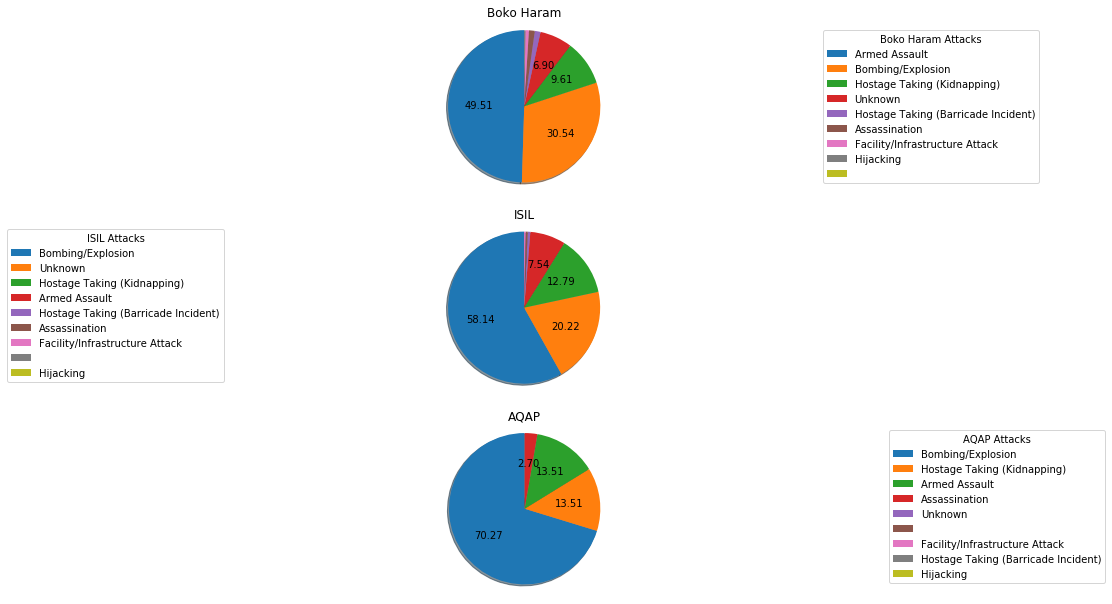

In [13]:
"""
In order to study the tactics used by each group, we are using the attacktype feature, which can range from a kidnapping
to a facility attack. According to the codebook, eight categories have been defined, with an additional one used
whenever the modus operandi is unknown
"""

number_attacks = 9
bokoharam_attacks = np.zeros((number_attacks, 1))
isil_attacks = np.zeros((number_attacks, 1))
aqap_attacks = np.zeros((number_attacks, 1))
attack_label = [None] * number_attacks

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 2 else ''

# Iterating through each dataframe separately

for index, rows in bokoharam_dataframe.iterrows():
    attack = rows['attacktype1'] - 1
    bokoharam_attacks[attack] += 1
    if attack_label[attack] == None:
        attack_label[attack] = rows['attacktype1_txt']
        
sort_bokoharam_attacks = np.fliplr([np.argsort(bokoharam_attacks[:, 0])])[0]
bokoharam_pie_attacks = np.fliplr([np.sort(bokoharam_attacks[:, 0])])[0]
        
for index, rows in isil_dataframe.iterrows():
    attack = rows['attacktype1'] - 1
    isil_attacks[attack] += 1
    if attack_label[attack] == None:
        attack_label[attack] = rows['attacktype1_txt']
        
sort_isil_attacks = np.fliplr([np.argsort(isil_attacks[:, 0])])[0]
isil_pie_attacks = np.fliplr([np.sort(isil_attacks[:, 0])])[0]
        
for index, rows in aqap_dataframe.iterrows():
    attack = rows['attacktype1'] - 1
    aqap_attacks[attack] += 1
    if attack_label[attack] == None:
        attack_label[attack] = rows['attacktype1_txt']
        
sort_aqap_attacks = np.fliplr([np.argsort(aqap_attacks[:, 0])])[0]
aqap_pie_attacks = np.fliplr([np.sort(aqap_attacks[:, 0])])[0]

bokoharam_label_attacks = [attack_label[i] for i in sort_bokoharam_attacks]
isil_label_attacks = [attack_label[i] for i in sort_isil_attacks]
aqap_label_attacks = [attack_label[i] for i in sort_aqap_attacks]
        
fig = plt.figure()

ax1 = fig.add_subplot(311, facecolor='w', frame_on=False)
fig.set_size_inches(10.5, 10.5)
    
ax1.pie(bokoharam_pie_attacks, labels=None, autopct=my_autopct,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels=bokoharam_label_attacks,
          title="Boko Haram Attacks",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("Boko Haram")

ax2 = fig.add_subplot(312, facecolor='w', frame_on=False)
fig.set_size_inches(10.5, 10.5)
    
ax2.pie(isil_pie_attacks, labels=None, autopct=my_autopct,
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.legend(labels=isil_label_attacks,
          title="ISIL Attacks",
          loc="best",
          bbox_to_anchor=(-0.005, 1))
ax2.set_title("ISIL")

ax3 = fig.add_subplot(313, facecolor='w', frame_on=False)
fig.set_size_inches(10.5, 10.5)
    
ax3.pie(aqap_pie_attacks, labels=None, autopct=my_autopct,
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.legend(labels=aqap_label_attacks,
          title="AQAP Attacks",
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax3.set_title("AQAP")
plt.show()

In [ ]:
"""
In order to start creating edges between our nodes, and thus assigning to each black node one of the three studied
terrorist groups, we are going to study their similarity by comparing their values for some more features than the two
ones displayed above. The selected features are :

 * attacktype1
 * targtype1
 * targsubtype1 (gives more detail about the target)
 * weaptype1
 * weapsubtype1 (more details about the weapon used, such as vehicle, Molotov cocktail, etc...)
"""